# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [282]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

#Review contents of CSV Files to identify Merge Type
#print(mouse_metadata, study_results)

# Combine the data into a single DataFrame
combined_data = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how="left")

# Display the data table for preview
combined_data


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [283]:
#Renamed data to work with more easily.
combined_data = combined_data.rename(columns={"Mouse ID" : "Mouse_ID",
                                              "Drug Regimen": "Drug_Regimen",
                                              "Weight (g)": "Weight_g",
                                              "Tumor Volume (mm3)" : "Tumor_Volume",
                                              "Metastatic Sites": "Metastatic_Sites"})
combined_data

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume,Metastatic_Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [284]:
# Checking the number of mice.
mouse_count = len(combined_data["Mouse_ID"].unique())
mouse_count

249

In [285]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# Reference for .duplicated: https://stackoverflow.com/questions/46640945/grouping-by-multiple-columns-to-find-duplicate-rows-pandas

duplicate_mouse_id = combined_data.loc[combined_data.duplicated(subset=['Mouse_ID', 'Timepoint']),'Mouse_ID'].unique()
duplicate_mouse_id


array(['g989'], dtype=object)

In [286]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse = combined_data[combined_data.duplicated(subset=["Mouse_ID", "Timepoint"], keep=False)]
duplicate_mouse

,Mouse_ID,Drug_Regimen,Sex,Age_months,Weight_g,Timepoint,Tumor_Volume,Metastatic_Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [287]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = combined_data.drop_duplicates(subset=["Mouse_ID", "Timepoint"])



In [288]:
# Checking the number of mice in the clean DataFrame.
mouse_count_new = clean_df["Mouse_ID"].nunique()
mouse_count_new

249

In [289]:
#Double check that duplicates have been removed. 
duplicate_mouse_id2 = clean_df.loc[clean_df.duplicated(subset=['Mouse_ID', 'Timepoint']),'Mouse_ID'].unique()
duplicate_mouse_id2

array([], dtype=object)

## Summary Statistics

In [290]:
clean_df.dtypes

Mouse_ID             object
Drug_Regimen         object
Sex                  object
Age_months            int64
Weight_g              int64
Timepoint             int64
Tumor_Volume        float64
Metastatic_Sites      int64
dtype: object

In [291]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
DR_mean=clean_df.groupby("Drug_Regimen").mean(numeric_only=True)["Tumor_Volume"]
DR_mean

DR_median=clean_df.groupby("Drug_Regimen").median(numeric_only=True)["Tumor_Volume"]
DR_median

DR_variance=clean_df.groupby("Drug_Regimen").var(numeric_only=True)["Tumor_Volume"]
DR_variance

DR_standev=clean_df.groupby("Drug_Regimen").std(numeric_only=True)["Tumor_Volume"]
DR_standev

DR_sem=clean_df.groupby("Drug_Regimen").sem(numeric_only=True)["Tumor_Volume"]
DR_sem

# Assemble the resulting series into a single summary DataFrame.
DR_df = pd.DataFrame({"Mean": DR_mean,
                      "Median": DR_median,
                      "Variance": DR_variance,
                      "Standard Deviation": DR_standev,
                      "SEM": DR_sem})

DR_df

,Mean,Median,Variance,Standard Deviation,SEM
Drug_Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [292]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line
#Reference to Aggregation Method: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.aggregate.html
#summary_stats2 = combined_data.groupby("Drug_Regimen").agg(["mean", "median", "var", "std", "sem"])["Tumor Volume (mm3)"]

#DR_df2=clean_df.groupby('Drug_Regimen').agg(['mean', 'median', 'var', 'std', 'SEM'])['Tumor_Volume']


## Bar and Pie Charts

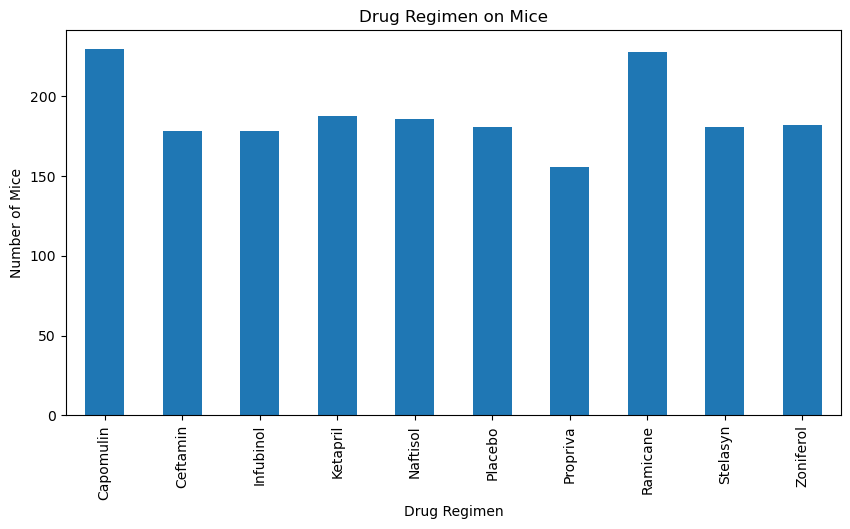

In [293]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Filter the DataFrame down only to those columns to chart
mouse_and_timepoint = clean_df.groupby(["Drug_Regimen"]).count()["Mouse_ID"]

mouse_and_timepoint.plot.bar(title='Drug Regimen on Mice', y="Number of Mice",figsize=(10,5));
plt.title("Drug Regimen on Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.show()


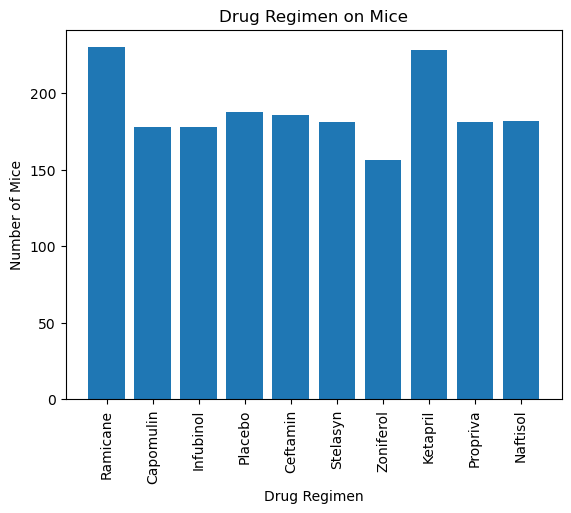

In [294]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Sort by Drug Regimen
drug_names=clean_df["Drug_Regimen"].unique()

# Create a list indicating where to write x labels and set figure size to adjust for space
x_axis = drug_names
y_axis = clean_df.groupby(["Drug_Regimen"]).count()["Mouse_ID"]

# # Set x axis and tick locations
tick_locations = x_axis

# # Set a Title and labels
plt.title("Drug Regimen on Mice")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

#Create Bar Chart with lists created
plt.bar(x_axis, y_axis)
plt.xticks(tick_locations, rotation= 90)
plt.show()

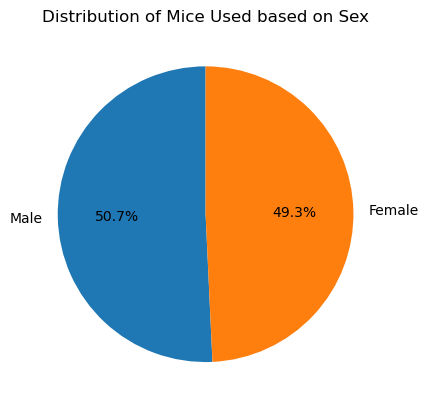

In [295]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex_distrib = clean_df["Sex"].value_counts()
sex_distrib.plot(kind="pie", y=" ",
                 autopct='%1.1f%%', 
                 startangle=90,
                 title="Distribution of Mice Used based on Sex",
                 ylabel= "");

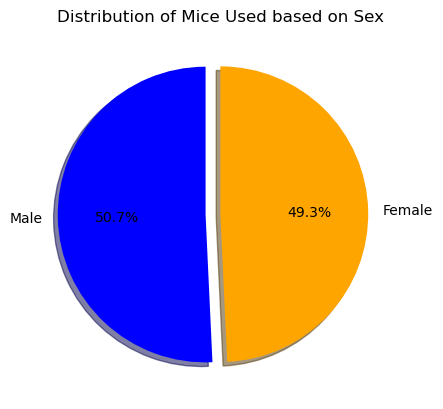

In [296]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Labels for the sections of our pie chart
labels = "Male", "Female"
# The values of each section of the pie chart
sizes = [958, 930]
# The colors of each section of the pie chart
colors = ["blue", "orange"]
# Tells matplotlib to separate the "Humans" section from the others
explode = (0.1, 0)

# Creates the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=90)
plt.title("Distribution of Mice Used based on Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [297]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = clean_df.groupby(["Mouse_ID"])["Timepoint"].max().reset_index()
#last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
max_timepoint_df=last_timepoint.merge(clean_df, on=["Mouse_ID", "Timepoint"], how="left")
max_timepoint_df    

,Mouse_ID,Timepoint,Drug_Regimen,Sex,Age_months,Weight_g,Tumor_Volume,Metastatic_Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1
...,...,...,...,...,...,...,...,...
244,z435,10,Propriva,Female,12,26,48.710661,0
245,z578,45,Ramicane,Male,11,16,30.638696,0
246,z581,45,Infubinol,Female,24,25,62.754451,3
247,z795,45,Naftisol,Female,13,29,65.741070,3


In [298]:
# Put treatments into a list for for loop (and later for plot labels)
four_treatment_names = {'Capomulin':[],
                        'Ramicane':[], 
                        'Infubinol':[], 
                        'Ceftamin':[]}

# Create empty list to fill with tumor vol data (for plotting)
total_tumor_volume = {'Capomulin':[],
                        'Ramicane':[], 
                        'Infubinol':[], 
                        'Ceftamin':[]}

#Loop through treatments
for name in four_treatment_names:
    #Loop through Max Timepoint
    for i in max_timepoint_df.index:
        #add the tumor volume to the list
        if max_timepoint_df.iloc[i]["Drug_Regimen"]==name:
            four_treatment_names[name].append(max_timepoint_df.iloc[i]["Tumor_Volume"])

#Create a new dataframe 
Tumor_and_Drug = pd.DataFrame(four_treatment_names)

# # Calculate the IQR and quantitatively determine if there are any potential outliers. 
for name in four_treatment_names:
    # add subset 
    subset= max_timepoint_df[max_timepoint_df["Drug_Regimen"]==name]
    quartiles = subset["Tumor_Volume"].quantile([.25, .5, .75])
    lowerq = quartiles[.25]
    upperq = quartiles[.75]
    iqr = upperq - lowerq 
    
    #Bounds 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    #     Determine outliers using upper and lower bounds
    outliers = max_timepoint_df.loc[(max_timepoint_df["Tumor_Volume"] <= lower_bound) | (max_timepoint_df["Tumor_Volume"] > upper_bound)]
    
print(outliers)

    Mouse_ID  Timepoint Drug_Regimen     Sex  Age_months  Weight_g  \
97      k403         45     Ramicane    Male          21        16   
175     s185         45    Capomulin  Female           3        17   

     Tumor_Volume  Metastatic_Sites  
97      22.050126                 1  
175     23.343598                 1  


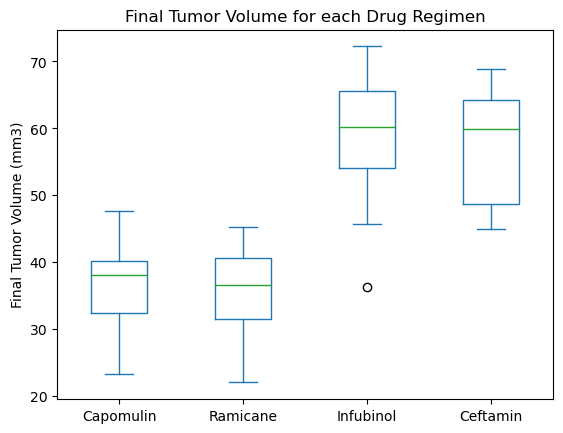

In [299]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
Tumor_and_Drug.plot(kind="box", title="Final Tumor Volume for each Drug Regimen", ylabel="Final Tumor Volume (mm3)", grid=False);


## Line and Scatter Plots

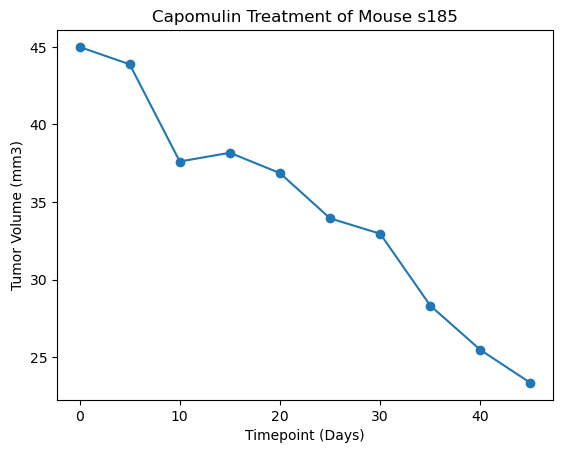

In [300]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
#Locate animals that were used for the Capomulin Trials
capomulin_df = clean_df.loc[clean_df["Drug_Regimen"]=="Capomulin",:]

#Store timepoints of specific mouse
mouse185_capomulin = capomulin_df.loc[capomulin_df["Mouse_ID"]=="s185",:]
mouse185_capomulin
#Create Plot parameters
x_axis = mouse185_capomulin["Timepoint"]
y_axis = mouse185_capomulin["Tumor_Volume"]

#Create plot
plt.plot(x_axis, y_axis, marker="o")
plt.title("Capomulin Treatment of Mouse s185")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)");

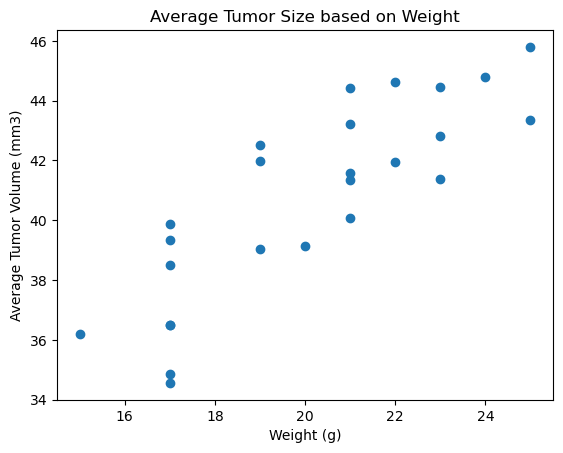

In [301]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
fig1, ax1 = plt.subplots()
average_tumor_vol_capo = capomulin_df.groupby(["Mouse_ID"]).mean(numeric_only=True)

plt.scatter(average_tumor_vol_capo["Weight_g"],average_tumor_vol_capo["Tumor_Volume"] )
plt.title("Average Tumor Size based on Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

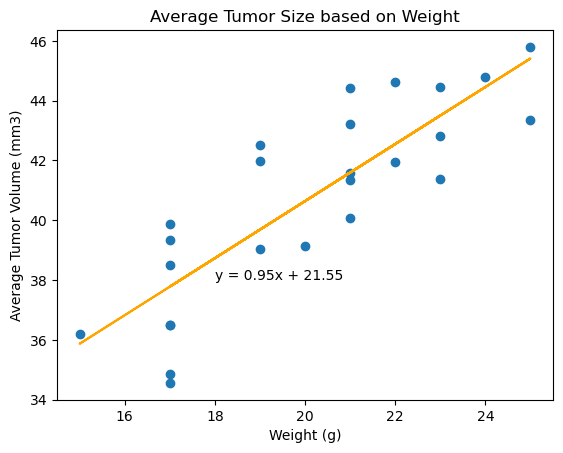

In [311]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr_co = st.pearsonr(average_tumor_vol_capo["Weight_g"],average_tumor_vol_capo["Tumor_Volume"]);

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(average_tumor_vol_capo["Weight_g"],average_tumor_vol_capo["Tumor_Volume"])
regress_vals = average_tumor_vol_capo["Weight_g"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(average_tumor_vol_capo["Weight_g"],average_tumor_vol_capo["Tumor_Volume"] )
plt.plot(average_tumor_vol_capo["Weight_g"], regress_vals, color="orange")
plt.annotate(line_eq, xy=(18,38))
plt.title("Average Tumor Size based on Weight")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()